In [1]:
#!pip install altair

Note: you may need to restart the kernel to use updated packages.


* Altair is a statistical visualization library for Python
* It is also very simple to create interactive visualizations with Altair.
* Altair is highly flexible in terms of data transformations. We can apply many different kinds of transformations while   creating a visualization.
* It makes the library even more efficient for exploratory data analysis.

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import altair as alt

In [6]:
#importing dataset
d_set= sns.load_dataset("mpg")
d_set.shape

(398, 9)

In [7]:
d_set.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [33]:
d_set.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [35]:
d_set.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [37]:
#columns data types
d_set.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [15]:
d_set.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [32]:
alt.Chart(d_set).mark_point().encode(alt.Y('mpg'),alt.X('horsepower'),alt.Color('origin'),alt.OpacityValue(0.8),size='displacement')

alt.Chart(...)

In [41]:
alt.Chart(d_set).mark_line().encode(alt.X('horsepower'),alt.Y('acceleration'),alt.Color("origin"))

alt.Chart(...)

<AxesSubplot:xlabel='horsepower', ylabel='acceleration'>

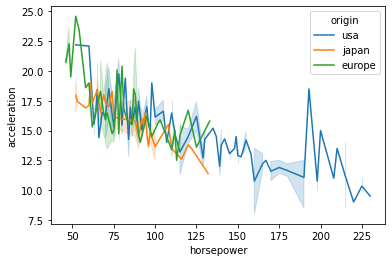

In [44]:
#sns.lineplot(data=d_set, x='horsepower', y='acceleration',hue='origin')

In [46]:
plot=alt.Chart(d_set).mark_bar(size=40).encode(
    alt.X('cylinders'),
    alt.Y('mpg'),
    alt.Color('origin')

)
plot.properties(title='cylinders vs mpg')

alt.Chart(...)

In [53]:
# Histogram
alt.Chart(d_set).mark_bar().encode(
    x='origin',
    y='count()',
    column='cylinders:Q',
    color=alt.Color('origin')
).properties(
    width=100,
    height=100    
)

alt.Chart(...)

In [62]:
alt.Chart(d_set).mark_bar().encode(
    alt.X("model_year:Q", bin=True),
    y='count()',
).configure_mark(
    opacity=0.8,
    color='Cyan'
)

alt.Chart(...)

In [83]:
alt.Chart(d_set).mark_tick(filled=True).encode(
    x='horsepower:Q',
    y='cylinders:O',
    color='origin'
)

alt.Chart(...)

In [78]:
# Bubble plots
alt.Chart(d_set).mark_point(filled=True).encode(x='horsepower',y='mpg',size='acceleration',color='origin').configure_mark(opacity=0.7)
   

alt.Chart(...)

In [81]:
brush = alt.selection(type='interval')
points = alt.Chart(d_set).mark_point().encode(
    x='horsepower:Q',
    y='mpg:Q',
    color=alt.condition(brush, 'origin:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(d_set).mark_bar().encode(
    y='origin:N',
    color='origin:N',
    x='count(origin):Q'
).transform_filter(
    brush
)
points & bars


alt.VConcatChart(...)

In [86]:
#selected orgin show sctatter data

In [87]:
selection = alt.selection_multi(fields=['origin'], bind='legend')
(alt.
  Chart(d_set).
  mark_circle(size=50).
  encode(
  x='horsepower', y='mpg',
  color= alt.Color('origin:N',
  scale=alt.Scale(scheme='category20b')),
  opacity=alt.condition(selection, alt.value(1), alt.value(0.1))
  ).
  properties(height=400, width=500).
  add_selection(selection))

alt.Chart(...)

In [95]:
#the bar plot to update the scatter plot.
#y-axis start at 5
# The zero parameter is set as “False” to prevent the axis from starting at zero.

In [106]:
selection = alt.selection(type='interval')
plt1 = (alt.
         Chart().
         mark_circle(size=50).
         encode(alt.X('horsepower'), alt.Y('mpg', scale=alt.Scale(zero=False)),
         alt.Color('origin')).
         transform_filter(selection))
plt2 = (alt.
         Chart().
         mark_bar().
         encode(
         x='origin', y='mean(mpg):Q',
         color=alt.condition(selection, alt.value("lightblue"),   
         alt.value("lightgray"))
         ).
         properties(height=300, width=200).
         add_selection(selection))

#The dataframe can be passed to the data parameter of the concatenate functions (hconcat or vconcat).
alt.hconcat(plt1, plt2, data=d_set)
 

alt.HConcatChart(...)

In [103]:
#Altair offers to customize the visualizations.
#We have also added a title by using the properties function.
#In some cases, we need to change the axis title because column names may not be appropriate or very clear. The title of X and Y encodings are used to change the axis title.

In [110]:
selection = alt.selection_multi(fields=['origin'], bind='legend')
(alt.
  Chart(d_set).
  mark_circle(size=40).
  encode(
    alt.X('horsepower', title="power"),
    alt.Y('mpg', scale=alt.Scale(zero=False), 
          title="milege"),
    alt.Color('origin', 
              legend=alt.Legend(
                 title='select origin?',  
                 orient='left',
                 titleFontSize=13,
                 labelFontSize=13
                 )
              ),
  opacity=alt.condition(selection, alt.value(1), alt.value(0.1))
    ).
  properties(title="Horsepower vs Milege",
             height=350, width=500). add_selection(selection))

alt.Chart(...)